# Association rule learning

### Key terms

- Association rules are if-then statements that help to show the probability of relationships between data items within large data sets in various types of databases. 

| TID                | Items Purchased                
|-----------         | --------------------------------------
|1                   | Bread, Milk                          |
|2                   | Bread, Diaper, Beer, Eggs            |
|3                   | Milk, Diaper, Beer, Coke             |
|4                   | Bread, Milk, Diaper, Beer            |
|5                   | Bread, Milk, Diaper, Coke            |

- ** Itemset **
    - A collection of one or more items, Example: {Milk, Bread, Diaper}
    - __k-itemset__ - An itemset that contains k items

- Association rule mining, at a basic level, involves the use of machine learning models to analyze data for patterns, or co-occurrence, in a database. It identifies frequent __if-then associations__, which are called __association rules__.


- An association rule has 2 parts: 
    - an _antecedent_  (if) and 
    - a  _consequent_  (then). 


    - An _antecedent_ is an item found within the data. 
    - A  _consequent_ is an item found in combination with the _antecedent_.


- Association rules are created by searching data for frequent if-then patterns and using the criteria of __support and confidence__ to identify the most important relationships. 


- __Support count__ 
    – Frequency of occurrence of an itemset
    – E.g. σ({Milk, Bread, Diaper}) = 2 
    

- __Support__ is an indication of how frequently the items appear in the data. 
    -  E.g. s({Milk, Bread, Diaper}) = 2/5
    - Support(S) of an association rule is defined as the percentage/fraction of records that contain {X --> Y} to the total number of records in the database. 
    - Suppose the support of an item is 0.1%, it means only 0.1% of the transaction contain purchases of this item.
    - Support (X --> Y) = Support count of (XY) / Total number of transaction in D


- __Confidence__ - of an association rule is defined as the percentage/fraction of the number of transactions that contain {X--> Y} to the total number of records that contain X. 
    - Confidence is a measure of strength of the association rules, 
    - suppose the confidence of the association rule X⇒Y is 80%, it means that 80% of the transactions that contain X also contain Y together.

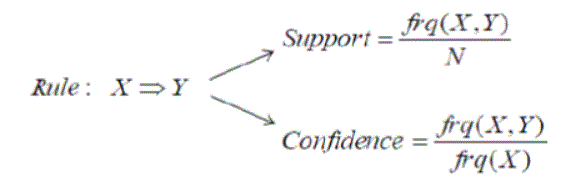

- __Frequent Itemset __
    – An itemset whose support is greater than or equal to a __min sup__ threshold


- A third metric, called __lift__, can be used to compare confidence with expected confidence.


- __Association Rules__
    - Association rules are calculated from itemsets, which are made up of two or more items. 
    - If rules are built from analyzing all the possible itemsets, there could be so many rules that the rules hold little meaning. 
    -  An implication expression of the form X → Y, where X and Y are itemsets – Example: {Milk, Diaper} → {Beer}
    
    - Given a database of transactions where each transaction is a collection of items (purchased by a customer)
    - find all rules that correlate the presence of one set of items with that of another set of items
        - Example: 
            - 30% of all transactions that contain diapers also contain beers; 
            - 5% of all transactions contain these items
            
                - 30%: confidence of the rule
                - 5%: support of the rule
            
        - We are interested in finding all such rules
    
- __Rule Evaluation Metrics__

    - Support (s) - Fraction of transactions that contain both X and Y
    - Confidence (c) - Measures how often items in Y appear in transactions that contain X
    
    Example: {Milk,Diaper} ⇒ Beer
    
    support    = $\frac{(Milk, Diaper, Beer)}{T} = \frac{2}{5} = .40$ 

    confidence = $\frac{(Milk, Diaper, Beer)}{(Milk, Diaper)} = \frac{2}{3} = .67 $
    
    - Given a set of transactions T, the goal of association rule mining is to find all rules having
        - support ≥ minsup threshold
        - confidence ≥ minconf threshold

### Association rule algorithms

    - AIS Algorithm
    - SETM Algorithm
    - Apriori Algorithm
    - AprioriTid Algorithm
    - AprioriHybrid Algorithm		
    
> - Apriori does better than AprioriTid in the earlier passes. However, AprioriTid does better than Apriori in the later passes. 
> - Hence, a hybrid algorithm can be designed that uses Apriori in the initial passes and switches to AprioriTid when it expects that the set C’ will fit in memory.


# Example 1 

Consider the following database, where each row is a transaction and each cell is an individual item of the transaction:

| TID                | Items Purchased                
|-----------         | --------------------------------------
|1                   | alpha, beta, epsilon          |
|2                   | alpha, beta, theta            |
|3                   | alpha, beta, epsilon          |
|4                   | alpha, beta, theta            |


The association rules that can be determined from this database are the following:

- 100% of sets with alpha also contain beta
-  50% of sets with alpha, beta also have epsilon
-  50% of sets with alpha, beta also have theta

# Example 2
Assume that a large supermarket tracks sales data by stock-keeping unit (SKU) for each item: each item, such as "butter" or "bread", is identified by a numerical SKU. 

The supermarket has a database of transactions where each transaction is a set of SKUs that were bought together.

Let the database of transactions consist of following itemsets:


| TID                | Itemsets                
|-----------         | --------------------------------------
|1                   | {1,2,3,4}          |
|2                   | {1,2,4}            |
|3                   | {1,2}              |
|4                   | {2,3,4}            |
|4                   | {2,3}              |
|4                   | {3,4}              |
|4                   | {2,4}              |

We will use Apriori to determine the frequent item sets of this database. To do this, we will say that an item set is frequent if it appears in at least 3 transactions of the database: the value 3 is the support threshold.

The first step of Apriori is to count up the number of occurrences, called the support, of each member item separately. By scanning the database for the first time, we obtain the following result

| Items              | Support count                
|-----------         | --------------------------------------
|{1}                 | 3          |
|{2}                 | 6          |
|{3}                 | 4          |
|{4}                 | 5          |

** Observations: **

- All the itemsets of size 1 have a support of at least 3, so they are all frequent.
- The next step is to generate a list of all pairs of the frequent items.
    - For example, regarding the pair {1,2}: the table shows items 1 and 2 appearing together in 3 of the itemsets; therefore, we say item {1,2} has support of 3.

| Items              | Support count                
|-----------         | --------------------------------------
|{1, 2}              | 3          |
|{1, 3}              | 1          |
|{1, 4}              | 2          |
|{2, 3}              | 3          |
|{2, 4}              | 4          |
|{3, 4}              | 3          |

** Observation **
- The pairs {1,2}, {2,3}, {2,4}, and {3,4} all meet or exceed the minimum support of 3, so they are frequent. 
- The pairs {1,3} and {1,4} are not. 
- Now, because {1,3} and {1,4} are not frequent, 
    - any larger set which contains {1,3} or {1,4} cannot be frequent. 
    - In this way, we can prune sets
    
    
we will now look for frequent __triples__ in the database

| Items              | Support count                
|-----------         | --------------------------------------
|{1, 2, 3}           | 0          |
|{1, 2, 4}           | 1          |
|{2, 3, 4}           | 2          |
|{1, 3, 4}           | 1          |


** Observation **
- there are no frequent triplets. {2,3,4} is below the minimal threshold, and 
- the other triplets were excluded because they were super sets of pairs that were already below the threshold.


** Apriori Algorithm **

- Pros 
    - Easy to understand and implement
    = Can use on large itemsets

- Cons
    - At times, you need a large number of candidate rules. 
    - It can become __computationally expensive__.The candidate generation could be extremely slow (pairs, triplets, etc.).
    - It is also an expensive method to calculate support because the calculation has to go through the entire database.
    - __Huge memory__ consumption

- How to Improve the Efficiency of the Apriori Algorithm?

    - Transaction Reduction – A transaction not containing any frequent k-itemset becomes useless in subsequent scans.
    - Hash-based Itemset Counting – Exclude the k-itemset whose corresponding hashing bucket count is less than the threshold is an infrequent itemset.
    - There are other methods as well such as partitioning, sampling, and dynamic itemset counting.